In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('sentimentdata.csv')
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [5]:
df.shape

(732, 15)

In [6]:
df.drop(columns='Unnamed: 0.1',inplace=True)

In [7]:
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [8]:
df.isnull().sum()

Id           0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [9]:
df.dtypes

Id             int64
Text          object
Sentiment     object
Timestamp     object
User          object
Platform      object
Hashtags      object
Retweets     float64
Likes        float64
Country       object
Year           int64
Month          int64
Day            int64
Hour           int64
dtype: object

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [11]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

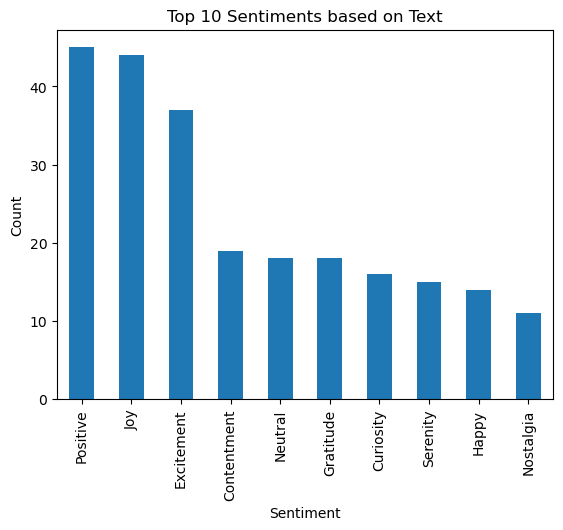

In [12]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [13]:
df['Platform'].value_counts()

Instagram    258
Twitter      243
Facebook     231
Name: Platform, dtype: int64

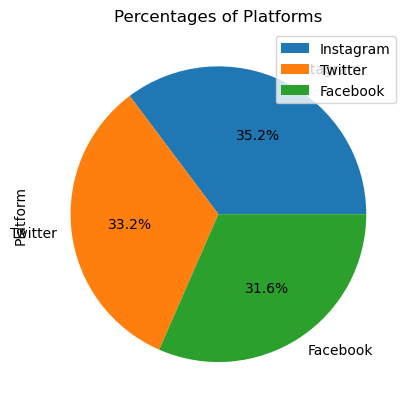

In [14]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

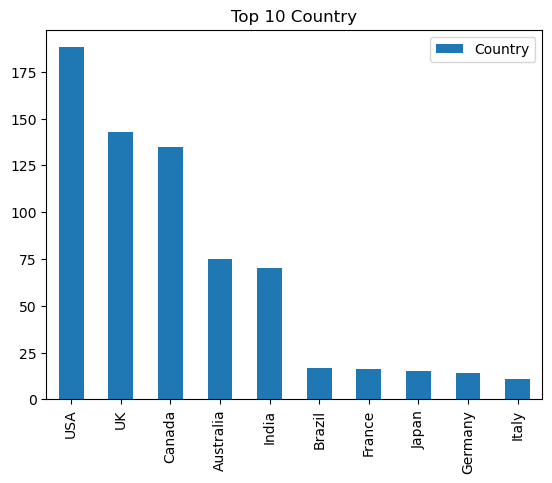

In [15]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Country')
plt.legend()
plt.show()

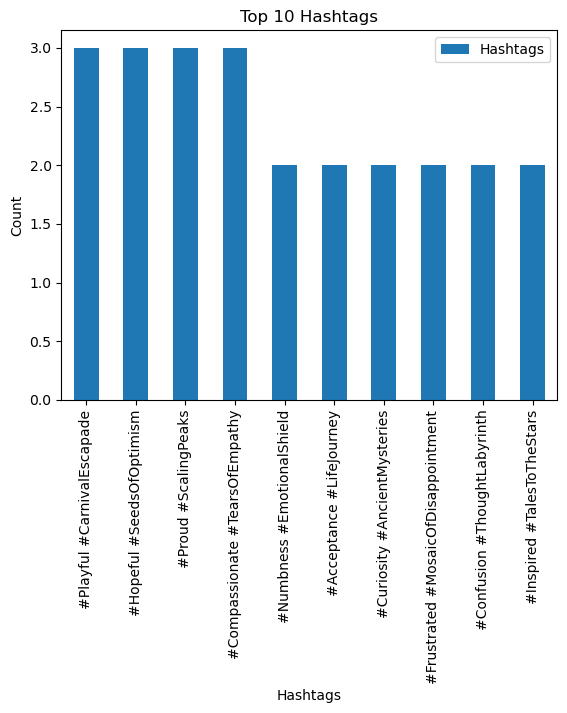

In [16]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

In [17]:
df.describe()

,Id,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [18]:
numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]
for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")

Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10.0 | Maximum Likes: 80.0
Minimum Retweets: 5.0 | Maximum Retweets: 40.0


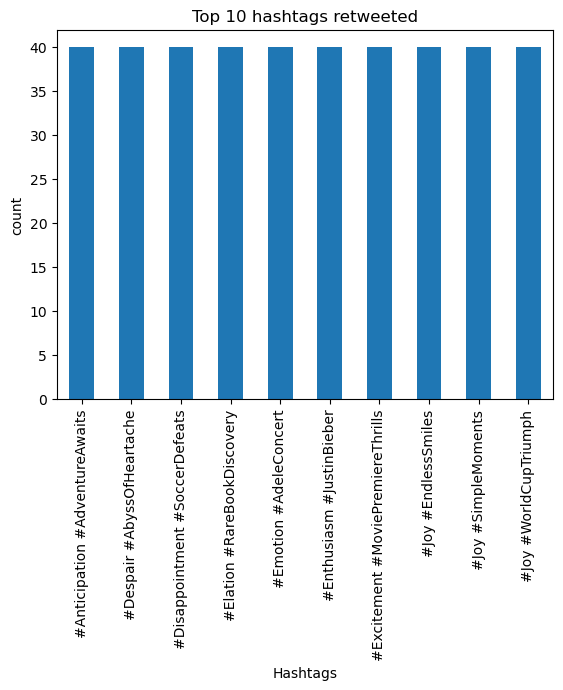

In [19]:
H_R=df.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 hashtags retweeted')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

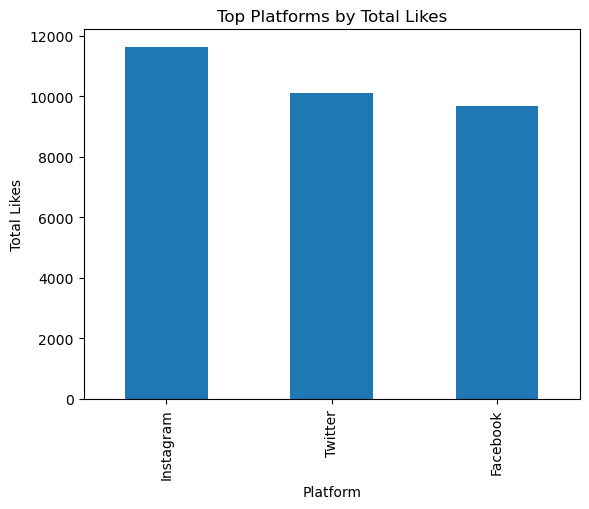

In [20]:
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

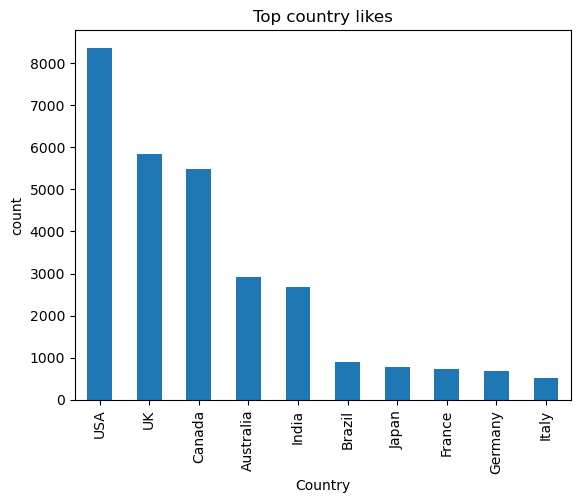

In [21]:
top_country_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Top country likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

In [22]:
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']
Instagram=df[df['Platform']=='Instagram']

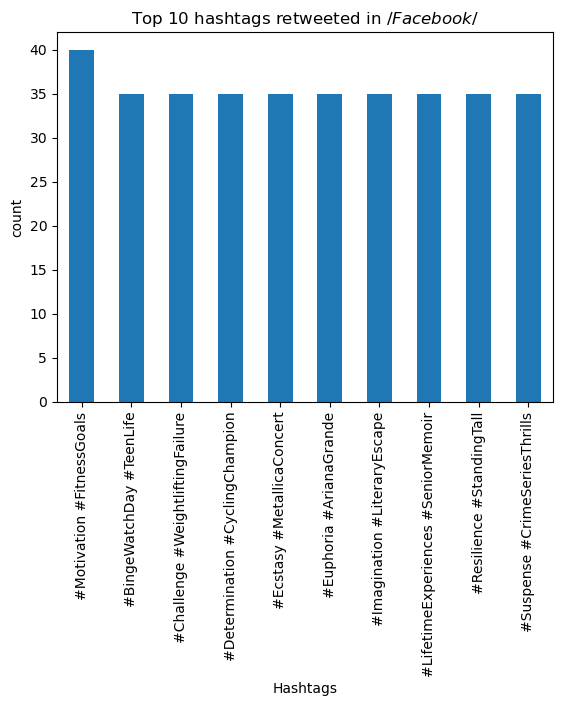

In [23]:
H_R_f=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Facebook $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

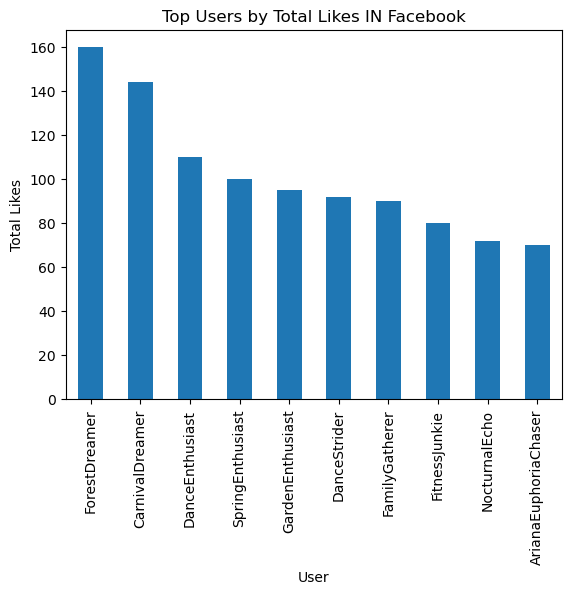

In [24]:
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_F.plot(kind='bar')
plt.title('Top Users by Total Likes IN Facebook')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

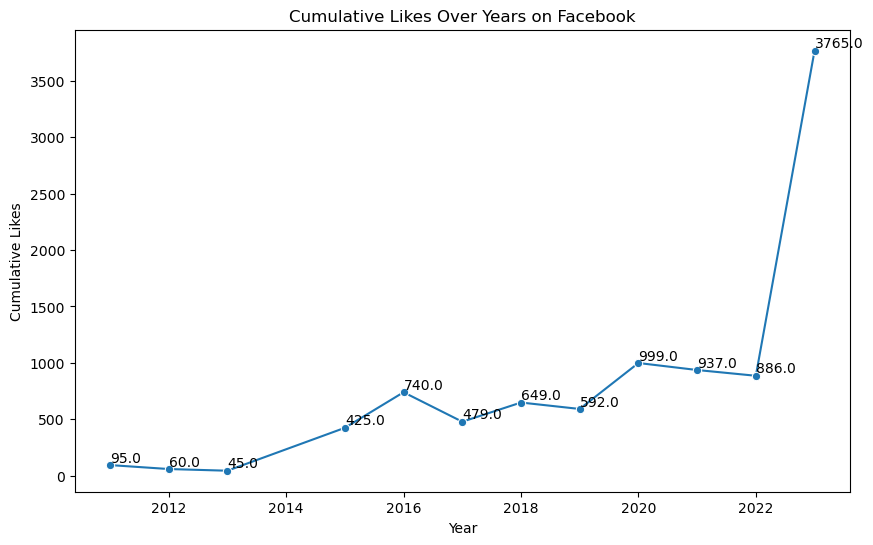

In [25]:
f = Facebook.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

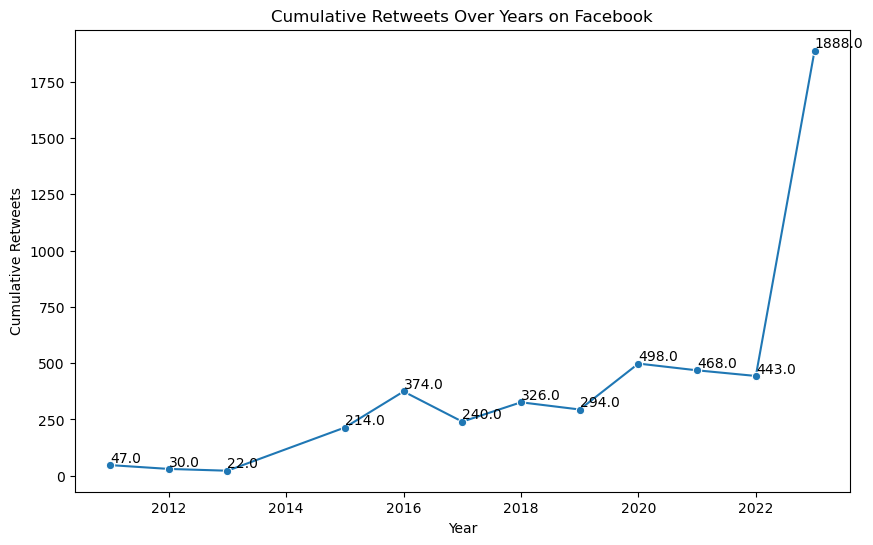

In [26]:
f = Facebook.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

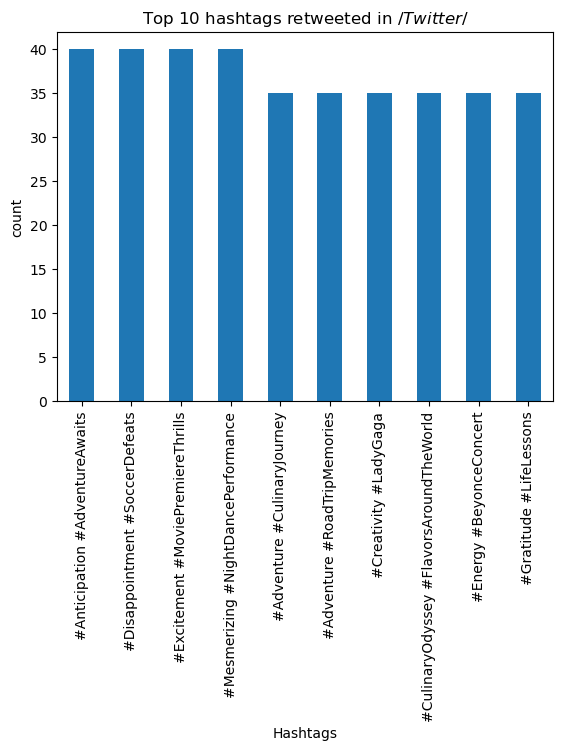

In [27]:
H_R_t=Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_t.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Twitter $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

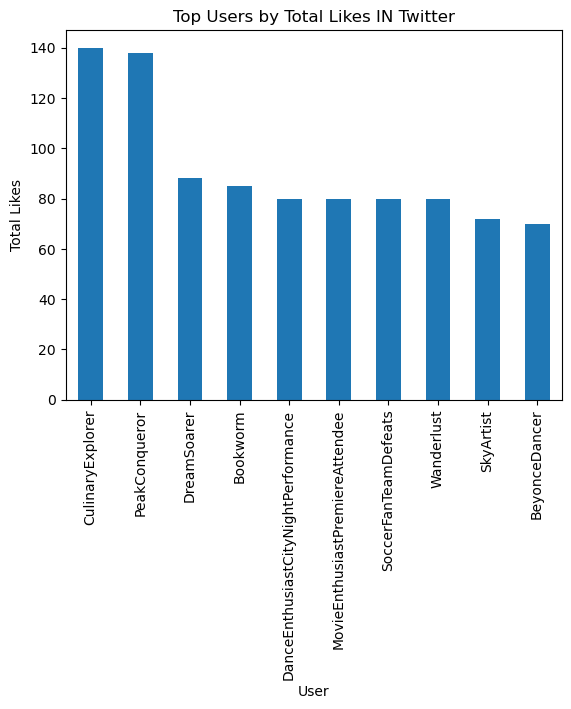

In [28]:
top_likes_platform_t = Twitter.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_t.plot(kind='bar')
plt.title('Top Users by Total Likes IN Twitter')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

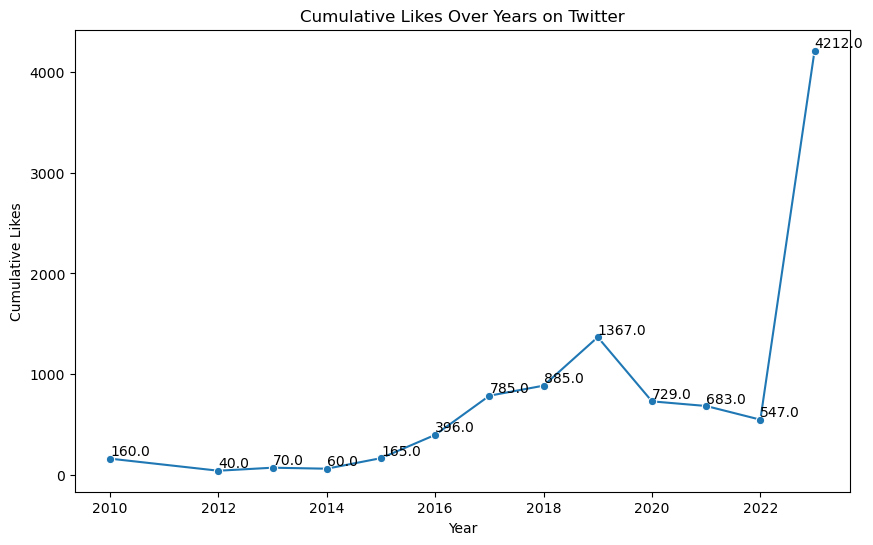

In [29]:
f = Twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

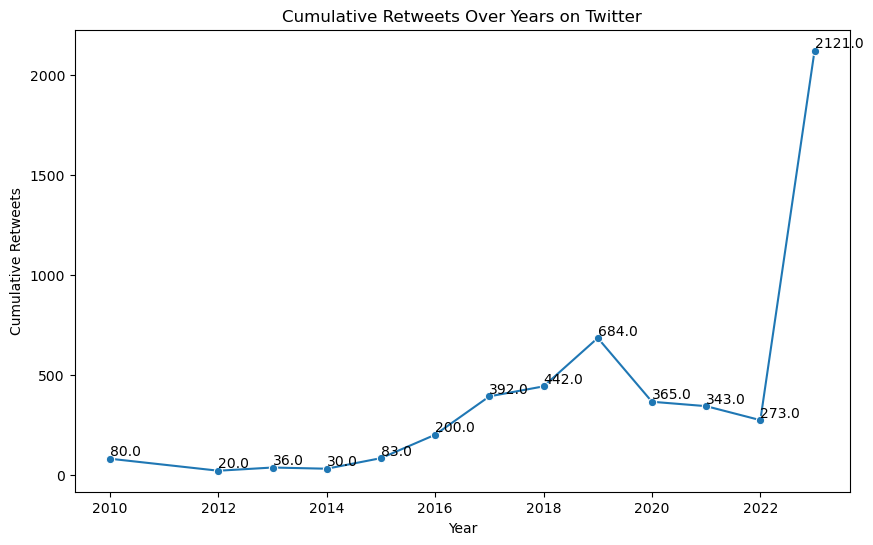

In [30]:
f = Twitter.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

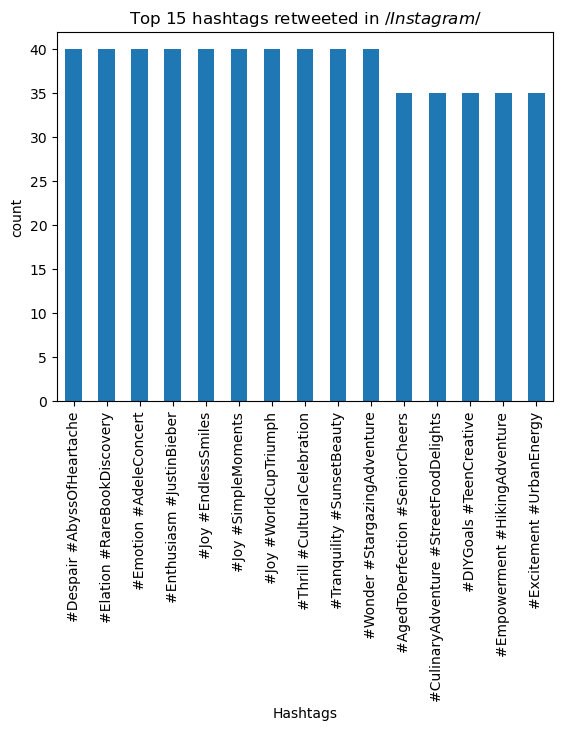

In [31]:
H_R_i=Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False)
H_R_i.plot(kind='bar')
plt.title('Top 15 hashtags retweeted in $/ Instagram $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

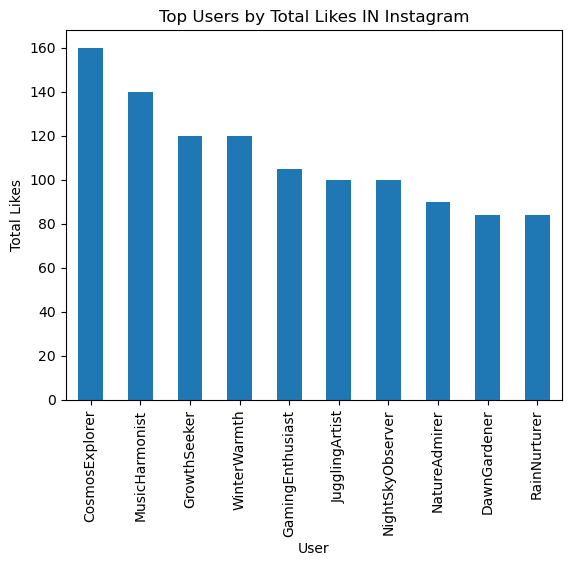

In [32]:
top_likes_platform_i = Instagram.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_i.plot(kind='bar')
plt.title('Top Users by Total Likes IN Instagram')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

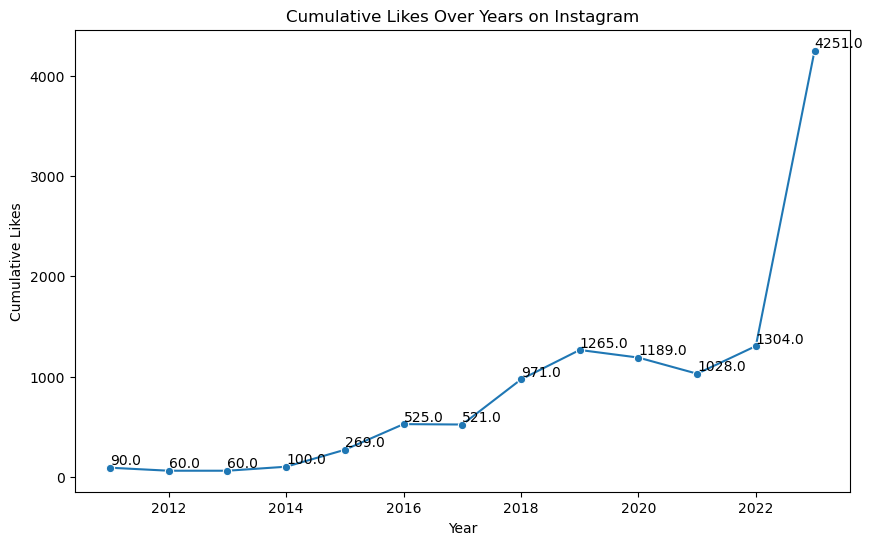

In [33]:
f = Instagram.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

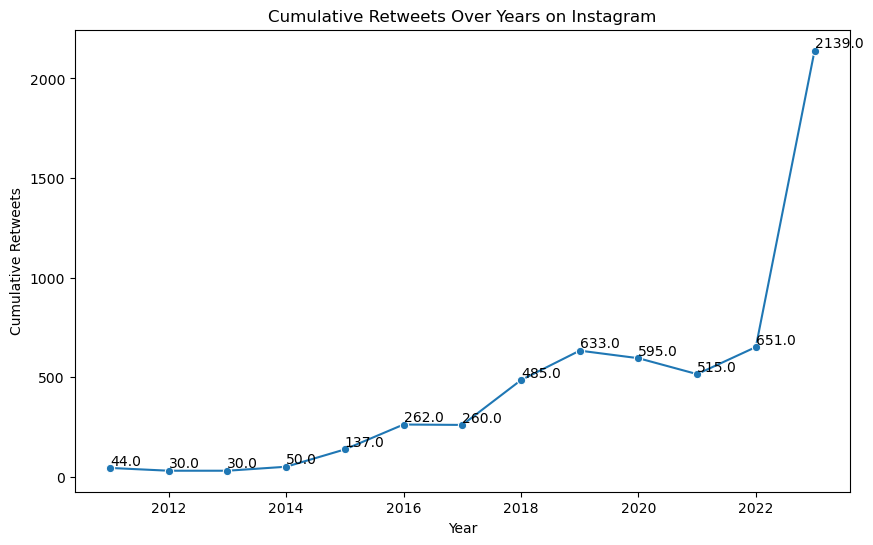

In [34]:
f = Instagram.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()